In [26]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import locale
%matplotlib inline

In [27]:
degrees = pd.read_csv('degrees-that-pay-back.csv')
salaries_region = pd.read_csv('salaries-by-region.csv')
salaries_type = pd.read_csv('salaries-by-college-type.csv')

# College Education in America

>  This dataset consists of three files with information regarding salaries as they relate to college education. The first and largest dataset comprises salary information for various college majors at multiple stages throughout their careers. The file contains starting median salaries and mid-career median salaries as well as mid-career salaries at the 10th, 25th, 75th, and 90th percentiles. The information for the 10th and 90th percentiles is incomplete, and as a result that information will not appear in this analysis. The other two files compare salary information against the regions the students graduated from and the types of schools attended. 
  
>  Much of the data in these files is not in a form that is usable. All the salaries are represented as strings instead of floats, so I must first remove the dollar signs and commas from the strings before finally converting them to floats.

In [29]:
#create functions to remove dollar signs and commas to turn strings into floats
def remove_dollar_sign(col):
    return col.apply(lambda x: x.strip('$'))

def to_float(col):
    return col.str.replace(',', '')
# These four columns are named the same in all three files, so I created a list with the titles of the columns.
cols = ['Starting Median Salary',  
        'Mid-Career Median Salary']

In [30]:
# Convert dollar entries to floats in columns to be used and sort entries based on starting median salary

degrees[cols] = degrees[cols].apply(remove_dollar_sign, axis=1)
degrees[cols] = degrees[cols].apply(to_float, axis=1)
degrees[cols] = degrees[cols].apply(pd.to_numeric, axis=1)

salaries_region[cols] = salaries_region[cols].apply(remove_dollar_sign, axis=1)
salaries_region[cols] = salaries_region[cols].apply(to_float, axis=1)
salaries_region[cols] = salaries_region[cols].apply(pd.to_numeric, axis=1)

salaries_type[cols] = salaries_type[cols].apply(remove_dollar_sign, axis=1)
salaries_type[cols] = salaries_type[cols].apply(to_float, axis=1)
salaries_type[cols] = salaries_type[cols].apply(pd.to_numeric, axis=1)



degrees = degrees.sort_values('Starting Median Salary')
salaries_region = salaries_region.sort_values('Starting Median Salary')
salaries_type = salaries_type.sort_values('Starting Median Salary')

## Which region gives the best salaries?

>One might be quick to assume that regions like California and the Northeast would pay better salaries out of college.

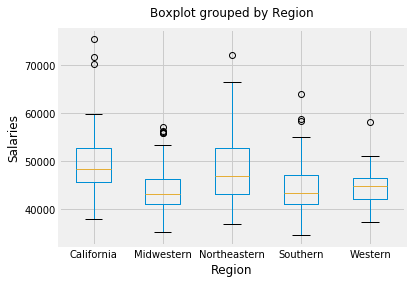

In [31]:
salaries_region.boxplot(column='Starting Median Salary', by='Region')
plt.title('')
plt.ylabel('Salaries')
plt.show()


>It appears that one's assumption would be correct. Graduates coming from California and the Northeast have higher median starting salaries than the other regions. The Northeast has a higher spread than California though. At the 25th percentile, the starting salaries are similar, but we see the Northeast boasting a starting salary a bit higher than California and much higher than the rest of the regions at the 75th percentile. If money is what matters most, then the coasts seem to be the place to study. Does this hold true later on in a graduate's career though?

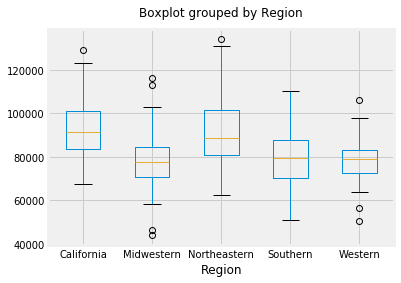

In [32]:
salaries_region.boxplot(column='Mid-Career Median Salary', by='Region')
plt.title('')
plt.show()


>Yes, it does hold true. As careers develop, graduates from schools on the coasts continue to boast the highest median salaries. 

## Is STEM always the way to go if income is the most important factor?

>Many students are excited to choose majors that get them a high starting salary, but does the data show that high salaries fresh after college lead to high salaries down the road? I'll start with a scatter plot of the starting and mid-career median salaries.

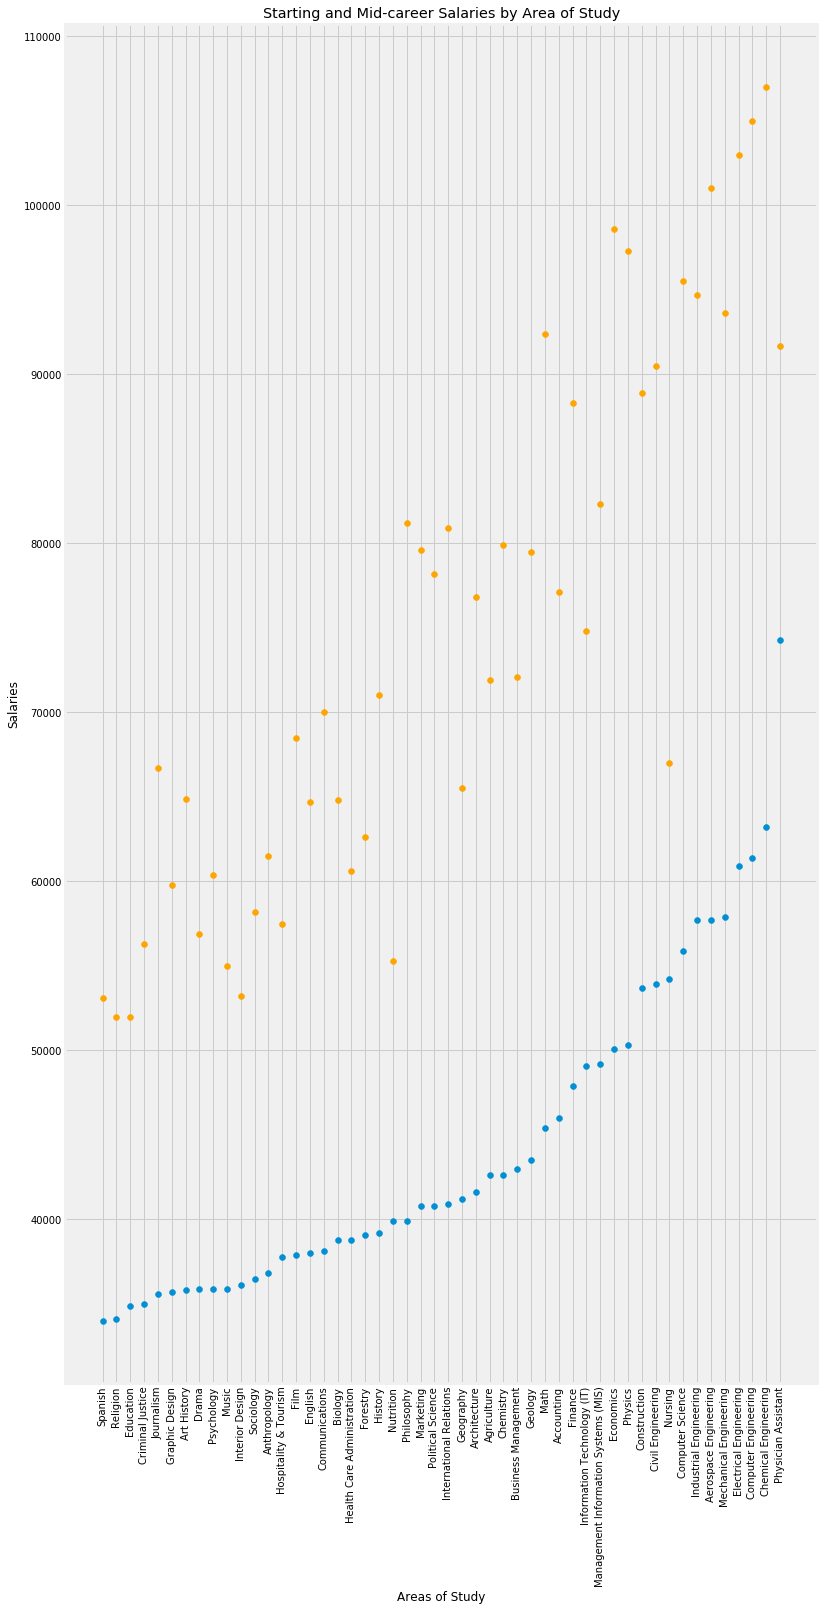

In [33]:
plt.figure(figsize=(12,25))
plt.scatter(x=degrees['Undergraduate Major'], y=degrees['Starting Median Salary'])
#plt.scatter(x=degrees['Undergraduate Major'], y=degrees['Mid-Career 25th Percentile Salary'], color='green')
plt.scatter(x=degrees['Undergraduate Major'], y=degrees['Mid-Career Median Salary'], color='orange')
#plt.scatter(x=degrees['Undergraduate Major'], y=degrees['Mid-Career 75th Percentile Salary'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('Areas of Study')
plt.ylabel('Salaries')
plt.title('Starting and Mid-career Salaries by Area of Study')
plt.show()

>The first thing that I notice is that many of the STEM majors have higher starting median salaries than even the mid-career median salaries of many of the liberal arts majors, and on top of that, many of those STEM majors have what appears to be the highest percent changes from starting to median salaries as well. This results in exclusively STEM majors approaching and even surpassing the $100K mark midway through their careers. The next scatter plot shows more clearly the percent change from starting to median salary for all of the majors in the file.

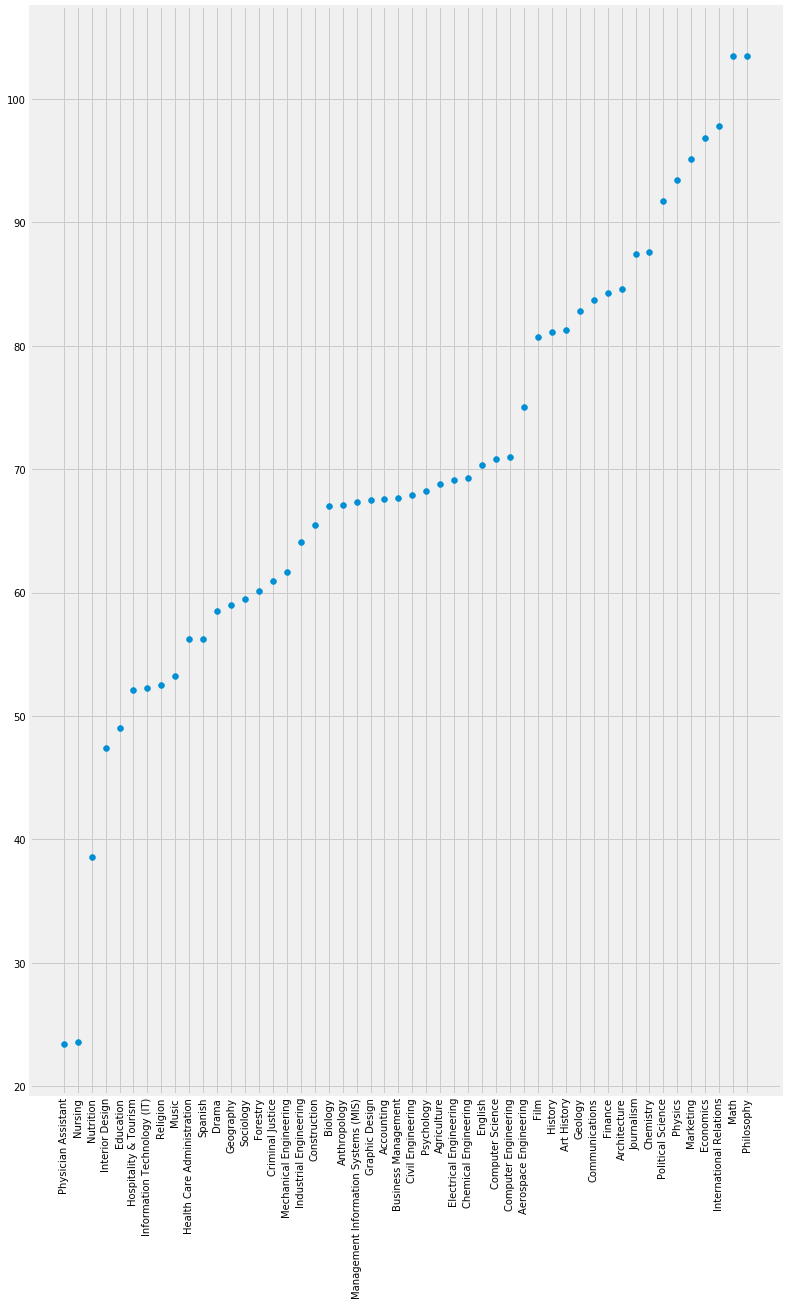

In [34]:
plt.figure(figsize=(12,20))
degrees = degrees.sort_values('Percent change from Starting to Mid-Career Salary')
plt.scatter(x=degrees['Undergraduate Major'], y=degrees['Percent change from Starting to Mid-Career Salary'])
plt.xticks(rotation=90)
plt.show()

>The first thing I notice is that the major with the highest median starting salary is the one with the lowest percent change to the mid-career median salary: physician assistant. Its extremely high starting salary is an outlier though, so I will disregard it for the analysis at hand. Outside of that, STEM majors do indeed boast some of the highest salary increases on top of their already high starting salaries. That being said, there are some non-STEM majors coming in with some of the highest salary increases: international relations, journalism, communications, and art history. STEM is not the only route to a good salary, but it does seem like the best way to start with a high salary and continue climbing even higher.

## Ivy League, Engineering, Or State?

>Does the type of school attended matter? Is Ivy League worth it?

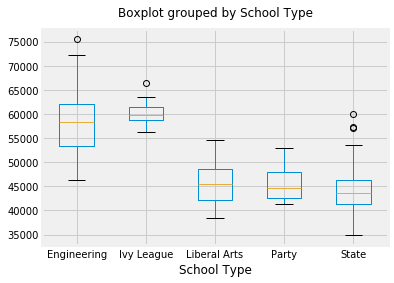

In [38]:
salaries_type.boxplot(column='Starting Median Salary', by='School Type')
plt.title('')
plt.show()

>Ivy League graduates do boast some of the highest salaries (not at all surprising given that they are located in the Northeast). However, engineering graduates also have high starting salaries with many graduates coming out ahead of their Ivy League counterparts. That said, engineering salaries have a very high spread, meaning that while those graduates may indeed come out ahead of Ivy League students, many will fall far below, with salaries similar to those in liberal arts and party schools. Just like earlier with the school regions, let's take a look at these graduates halfway through their career.

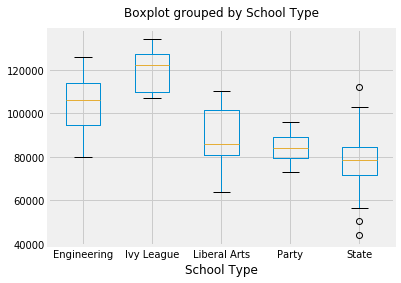

In [36]:
salaries_type.boxplot(column='Mid-Career Median Salary', by='School Type')
plt.title('')
plt.show()

>Ivy League students pull away from engineering graduates as their careers grow, perhaps in part due to the prestige associated with those schools. Liberal arts, party, and state school graduates continue to lag behind. Not all university educations may be equal, but it appears that any university education is better than none.

## Next Steps

With the data in these three files, there is certainly much more to extrapolate, but I am not convinced much of it would be interesting. This data set leaves many questions unanswered and there is not a way to find those answers without additional data. Do the higher salaries from California and the Northeast follow graduates if they move to another region of the country, or do they only receive those salaries if they stay in those regions? How does one precisely define a "party" school? Are the regions used too large to be meaningful? Seattle and Salt Lake City are both in the West but likely produce graduates with differing salaries, and the same can likely be said of Chicago and Des Moines in the Midwest. With more data, the answers to these questions might reveal themselves.